<a href="https://colab.research.google.com/github/mov-z/LLM-Tutorials/blob/main/examples/Open_source_LLM_with_Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HuggingfaceÎ•º Ïù¥Ïö©Ìïú Open-source LLM ÏòàÏ†ú**

**Huggingface**Î•º Ïù¥Ïö©Ìï¥ **Open-source** **LLM**ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í∏∞Î≥∏Ï†ÅÏù∏ ÏòàÏ†úÏûÖÎãàÎã§.
Colab GPU Î©îÎ™®Î¶¨ ÌïúÍ≥ÑÍ∞Ä ÏûàÏúºÎãà, Ìïú Î≤àÏùò Îü∞ÌÉÄÏûÑÏóê ÌïòÎÇòÏùò Î™®Îç∏Îßå ÌÖåÏä§Ìä∏Ìï¥ Î≥¥ÏãúÎäî Í±∏ Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§.

- ÏòàÏ†ú Î™®Îç∏: Google Gemma, Meta Llama

## **1. ÌôòÍ≤Ω ÏÑ∏ÌåÖ**
- ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
- Huggingface API access token ÏûÖÎ†•

In [ ]:
# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
!pip install -q transformers

In [ ]:
import transformers
import torch
from transformers import pipeline
from IPython.display import Markdown, display

def get_response_gemma(pipe, messages, max_new_tokens=256):
  outputs = pipe(messages, max_new_tokens=max_new_tokens)
  assistant_response = outputs[0]["generated_text"][-1]["content"].strip()
  return assistant_response

def get_response_llama2(prompt, max_length=256):
    generated = pipe_llama(prompt, max_length=max_length, num_return_sequences=1)
    return generated[0]['generated_text']

### Huggingface Î™®Îç∏ ÏÇ¨Ïö© Í∂åÌïú Ïù∏Ï¶ù

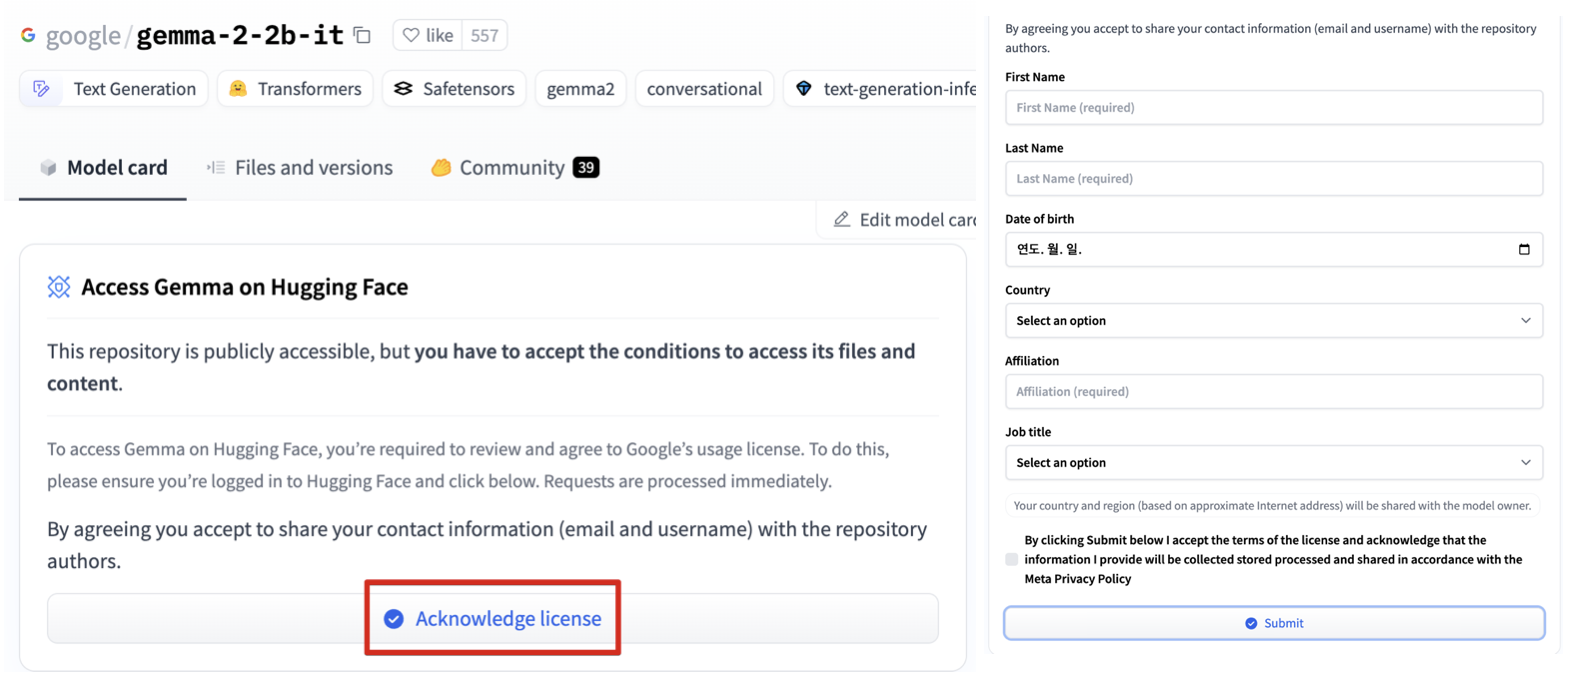

- HuggingfaceÏùò ÏùºÎ∂Ä Î™®Îç∏ÏùÄ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ Ïù∏Ï¶ù Ï†àÏ∞®Í∞Ä ÌïÑÏöî
- HuggingfaceÏóêÏÑú ÏÇ¨Ïö©Ìï† Î™®Îç∏ÏùÑ Ï∞æÏïÑ Í∞ÑÎã®Ìïú Ïù∏Ï¶ù Ï†àÏ∞®Î•º Í±∞ÏπòÎ©¥ ÏùºÏ†ï ÏãúÍ∞Ñ ÌõÑ ÏäπÏù∏ Îê®

In [ ]:
# Huggingface Access Tokens - Huggingface > settings > Access Tokens
# HuggingfaceÏóê API ÌÜ†ÌÅ∞ÏùÑ Ï†ÄÏû•ÌïòÍ≥† Î°úÍ∑∏Ïù∏
from huggingface_hub import login
from getpass import getpass

# Hugging Face API ÌÜ†ÌÅ∞ ÏûÖÎ†•
hf_token = getpass("Hugging Face API ÌÜ†ÌÅ∞ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: ")
login(token=hf_token)

Hugging Face API ÌÜ†ÌÅ∞ÏùÑ ÏûÖÎ†•ÌïòÏÑ∏Ïöî: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
!nvidia-smi

Sat Sep 21 09:27:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **2. Google Gemma**
- GoogleÏùò Ïò§ÌîàÏÜåÏä§ LLMÏù∏ **Gemma**
- google/gemma-2-2b-it
- 2B parameters Î™®Îç∏Ïù¥Îùº **ÏΩîÎû© GPU** ÌôòÍ≤ΩÏóêÏÑú Íµ¨Îèô

In [ ]:
pipe_gemma = pipeline(
    "text-generation",
    model="google/gemma-2-2b-it",
    model_kwargs={"torch_dtype": torch.bfloat16},
    device="cuda",  # replace with "mps" to run on a Mac device
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
messages = [
    {"role": "user", "content": "LLMÏóê ÎåÄÌï¥ ÏÑ§Î™ÖÌï¥Ï§ÑÎûò?"},
]

response = get_response_gemma(pipe_gemma, messages)
Markdown(response)

## LLM (Large Language Model) Ïóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Ïûê!

LLMÏùÄ **ÎåÄÍ∑úÎ™® Ïñ∏Ïñ¥ Î™®Îç∏**Ïù¥ÎùºÍ≥† Î∂àÎ¶¨Îäî Í≤É. 

**ÏâΩÍ≤å ÎßêÌï¥, ÏóÑÏ≤≠ÎÇú ÏñëÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÏó¨ ÏÇ¨ÎûåÏ≤òÎüº ÎßêÌïòÍ≥† Í∏ÄÏùÑ Ïì∞Îäî Ïª¥Ìì®ÌÑ∞ ÌîÑÎ°úÍ∑∏Îû®ÏûÖÎãàÎã§.** 

**Ïñ¥Îñ§ Ï†êÏù¥ ÌäπÎ≥ÑÌïúÍ∞ÄÏöî?**

* **ÏóÑÏ≤≠ÎÇú Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµ:** 
    * ÌÖçÏä§Ìä∏, ÏΩîÎìú, Ïù¥ÎØ∏ÏßÄ Îì± Îã§ÏñëÌïú ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌï©ÎãàÎã§. 
    * ÎπÖ Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Ïù∏Í∞ÑÏùò Ïñ∏Ïñ¥ Ìå®ÌÑ¥ÏùÑ Ïù¥Ìï¥ÌïòÍ≥†, 
    * Îã§ÏñëÌïú Ïñ∏Ïñ¥Î•º Ïù¥Ìï¥ÌïòÍ≥† ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.
* **Ïù∏Í∞ÑÏ≤òÎüº ÎßêÌïòÍ≥† Í∏ÄÏùÑ Ïì∞Îäî Îä•Î†•:** 
    * ÌÖçÏä§Ìä∏ ÏÉùÏÑ±, Î≤àÏó≠, ÏöîÏïΩ, ÏßàÎ¨∏ ÎãµÎ≥Ä Îì± Îã§ÏñëÌïú ÏûëÏóÖÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.
    * Ìù•ÎØ∏Î°úÏö¥ Ïù¥ÏïºÍ∏∞Î•º Ïì∞Í±∞ÎÇò, 
    * Í∏¥ Í∏ÄÏùÑ ÏöîÏïΩÌïòÍ±∞ÎÇò, 
    * ÏÉàÎ°úÏö¥ Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌïòÎäî Îì± Ïù∏Í∞ÑÏùò Ïñ∏Ïñ¥ Îä•Î†•ÏùÑ Î™®Î∞©Ìï©ÎãàÎã§.
* **Îã§ÏñëÌïú Î∂Ñ

In [ ]:
messages = [
    {"role": "user", "content": "Í±∞Ïãú Í≤ΩÏ†úÏóê ÎåÄÌï¥ ÏÑ§Î™ÖÌï¥Ï§ò"},
]
response = get_response_gemma(pipe_gemma, messages)
Markdown(response)

## Í±∞Ïãú Í≤ΩÏ†ú: ÏÑ∏Í≥ÑÎ•º Î∞îÎùºÎ≥∏ Í≤ΩÏ†úÌïô

Í±∞Ïãú Í≤ΩÏ†úÎäî **Íµ≠Ï†úÏ†ÅÏù∏ Í≤ΩÏ†ú ÏãúÏä§ÌÖúÍ≥º Ï†Ñ ÏÑ∏Í≥ÑÏ†ÅÏù∏ Í≤ΩÏ†úÏ†Å ÌòÑÏÉÅÏùÑ Îã§Î£®Îäî Í≤ΩÏ†úÌïô Î∂ÑÏïº**ÏûÖÎãàÎã§. 

**ÌïµÏã¨ Í∞úÎÖê:**

* **Íµ≠Ï†úÏ†Å Í≤ΩÏ†ú:** Íµ≠Ï†úÏ†ÅÏù∏ Í≤ΩÏ†ú Í¥ÄÍ≥Ñ, ÏûêÎ≥∏ Ïù¥Îèô, ÏÉÅÌíà Î∞è ÏÑúÎπÑÏä§ ÍµêÌôò, Ìà¨Ïûê, Í≤ΩÏ†úÏ†Å ÌòëÎ†• Îì±ÏùÑ Ìè¨Ìï®Ìï©ÎãàÎã§.
* **Ï†Ñ ÏÑ∏Í≥ÑÏ†Å Í≤ΩÏ†ú:** ÏÑ∏Í≥Ñ Í∞ÅÍµ≠Ïùò Í≤ΩÏ†ú ÏÑ±Ïû•, Î∂àÍ∑†Ìòï, Í≤ΩÏ†úÏ†Å ÌòëÎ†•, Í≤ΩÏ†úÏ†Å ÏúÑÍ∏∞ Îì±ÏùÑ Îã§Î£πÎãàÎã§.
* **Í≤ΩÏ†úÏ†Å ÌùêÎ¶Ñ:** ÏÑ∏Í≥Ñ Í≤ΩÏ†úÏùò ÌùêÎ¶Ñ, Í≤ΩÏ†úÏ†Å Î≥ÄÌôî, Í≤ΩÏ†úÏ†Å Í∑úÏ†ú, Í≤ΩÏ†úÏ†Å ÌòëÎ†• Îì±ÏùÑ Î∂ÑÏÑùÌï©ÎãàÎã§.

**Ï£ºÏöî Î∂ÑÏïº:**

* **Íµ≠Ï†ú Í≤ΩÏ†ú:** Íµ≠Ï†ú Í∏àÏúµ ÏãúÏä§ÌÖú, Íµ≠Ï†ú Í∏∞Íµ¨, Íµ≠Ï†ú ÌòëÎ†•, Íµ≠Ï†ú Í≤ΩÏ†ú Ï†ïÏ±Ö Îì±ÏùÑ Îã§Î£πÎãàÎã§.
* **Í≤ΩÏ†úÏ†Å Í∑úÏ†ú:** Íµ≠Ï†úÏ†Å Í≤ΩÏ†ú Í∑úÏ†ú, Íµ≠Ï†úÏ†Å Í≤ΩÏ†ú ÌòëÎ†•, Íµ≠Ï†úÏ†Å Í≤ΩÏ†ú

## **3. Meta Llama**
- MetaÏùò Ïò§ÌîàÏÜåÏä§ LLMÏù∏ **Llama**
- Llama3.1Ïùò Í≤ΩÏö∞ Í∞ÄÏû• ÏûëÏùÄ Î™®Îç∏Ïù¥ 8B ‚û°Ô∏è ÏΩîÎû© GPU Î©îÎ™®Î¶¨ ÌÑ∞Ïßê üò¢
- ÏòàÏ†úÏóêÏÑúÎäî 7B ÌÅ¨Í∏∞Ïù∏ meta-llama/Llama-2-7b-hf Î™®Îç∏ ÏÇ¨Ïö©

In [ ]:
# model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
model_id = "meta-llama/Llama-2-7b-hf"

pipe_llama = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="cuda",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
prompt = "Explain the Python language"
output = get_response_llama2(prompt)

print(output)

Explain the Python language in 5 minutes
Python is a general-purpose, high-level programming language. Its design philosophy emphasizes code readability with its notable use of significant indentation. Python supports multiple programming paradigms, including object-oriented, imperative, functional, and procedural styles.
Python is an interpreted language, meaning that code is executed on the fly without compiling. This makes it a popular choice for scripting and rapid prototyping.
Python has a large and active community of developers, and it is widely used in a variety of fields, including web development, data science, and machine learning.
Python is a high-level programming language that was created in the late 1980s. It is designed to be easy to read and understand, and it is often used for web development and data analysis.
Python is an interpreted language, which means that it is executed on the fly without compiling. This makes it a popular choice for rapid prototyping and scrip

In [ ]:
prompt = "Explain aerobic exercise"
output = get_response_llama2(prompt)

print(output)

Explain aerobic exercise in the human body.
Explain the difference between aerobic and anaerobic exercise.
Describe the benefits of aerobic exercise.
Describe the benefits of anaerobic exercise.
Describe the benefits of strength training.
Explain the benefits of flexibility training.
Explain the importance of stretching.
Describe the benefits of balance training.
Explain the benefits of relaxation training.
Explain the benefits of meditation.
Explain the benefits of visualization.
Explain the benefits of yoga.
Explain the benefits of Tai Chi.
Explain the benefits of Pilates.
Explain the benefits of swimming.
Explain the benefits of bicycling.
Explain the benefits of running.
Explain the benefits of walking.
Explain the benefits of hiking.
Explain the benefits of dancing.
Explain the benefits of jumping rope.
Explain the benefits of plyometrics.
Explain the benefits of weight training.
Explain the benefits of circuit training.
Explain the benefits of interval training.
Explain the benef